# Wine Quality Project

### Index
1.  [Exploratory Data Analysis](#exploratory-data-analysis)
2.  [Feature Selection](#feature-selection)
3.  [Feature Verification and Hypothesis Testing](#feature-verification-and-hypothesis-testing)
4.  [Class Balancing](#class-balancing)
5.  [Model 1: Logistic Regression](#model-1-logistic-regression)
6.  [Model 2: Decision Trees](#model-2-decision-trees)
7.  [Model 3: Random Forests](#model-3-random-forests)
8.  [Model 4: Gradient Boosting](#model-4-gradient-boosting)
9.  [Model Selection & Hyperparameter Tuning](#model-selection-and-hyperparameter-tuning)
10. [Cross-validation](#cross-validation)
11. [Final Results](#final-results)


# 1: Exploratory Data Analysis

### load and discover data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

from scipy.stats import f_oneway, kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, recall_score


In [16]:
df_white = pd.read_csv('winequality-white.csv', sep=';', header=0).copy()
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [17]:
df_white.shape

(4898, 12)

In [18]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [19]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
# Rename columns

df_white.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)

In [21]:
df_white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
df_white.duplicated().sum()

937

In [23]:
# view duplicates 

duplicates = df_white.duplicated()

df_filtered = df_white[duplicates]
df_filtered

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [24]:
df_white = df_white.drop_duplicates().reset_index(drop=True)

In [25]:
df_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,3961.0,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile_acidity,3961.0,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric_acid,3961.0,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual_sugar,3961.0,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3961.0,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free_sulfur_dioxide,3961.0,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total_sulfur_dioxide,3961.0,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,3961.0,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3961.0,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [26]:
df_white['quality'].value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

* There are fewer entries for the quality values 3, 4, 8, and 9, which could result in class imbalance in our ML model on next steps. 

## check outliers and data distribution

In [27]:
# List of features

features = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 
    'pH', 'sulphates', 'alcohol', 'quality'
]

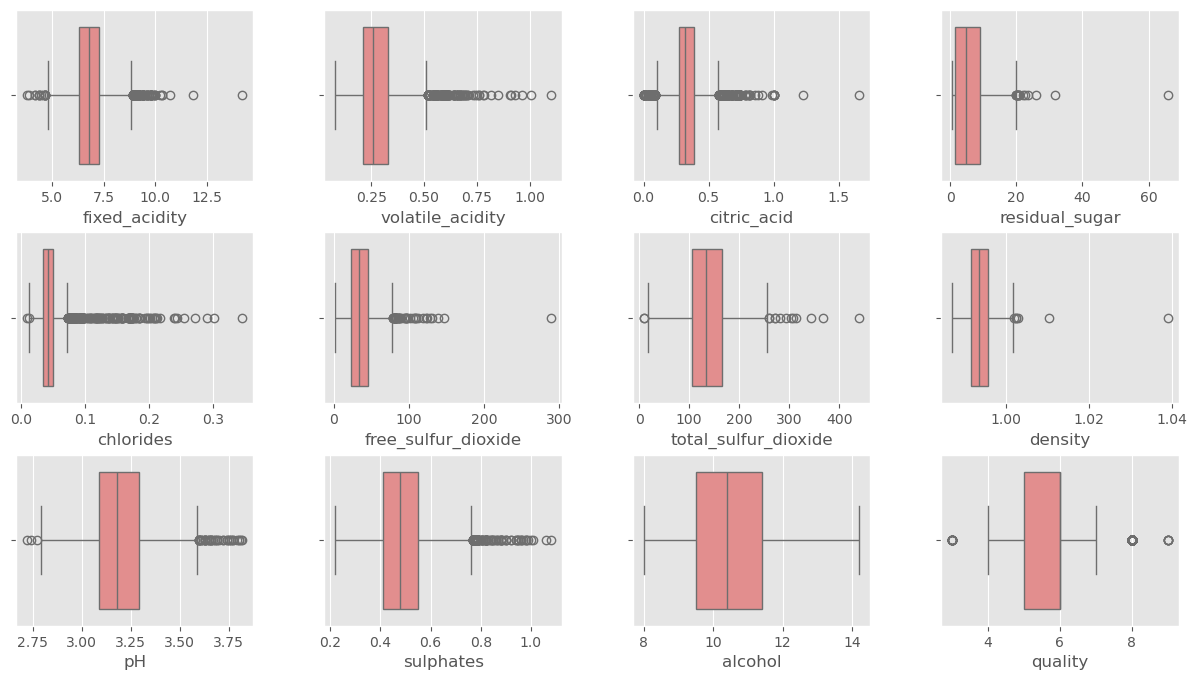

In [28]:
# Create boxplots for each feature

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns, plot by index
    sns.boxplot(x=df_white[feature], color='lightcoral')
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

* The dataset includes samples that have been rated by wine experts, so we aim to retain as many rows as possible.
* However, some features have extreme outliers, which can negatively impact the performance of the model.
* we will not touch outliers on this step since we will review them in detail after feature selection. 

# 2: Feature Selection

In [29]:
df_white['quality'].value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

In [30]:
df_white['quality'].mean()

5.854834637717748

* In this step, we will create a new feature called quality_label to categorize the quality rankings of wine (from 3 to 9) into three groups: low, medium, and high. 
* It will be as follows:

    * Scores of 3, 4 will be labeled as 0 (low quality).
    * Scores of 5,6,7 will be labeled as 1 (medium quality).
    * Scores of 8,9 will be labeled as 2 (high quality).

* This categorization will help improve the model's performance by simplifying the target variable.

In [31]:
# Create a 'quality_label' column to categorize wine quality

df_white['quality_label'] = df_white['quality'].apply(
    lambda x: 0 if x in [3, 4, 5] else (1 if x in [6, 7] else 2)
)


df_white['quality_label'].value_counts()



quality_label
1    2477
0    1348
2     136
Name: count, dtype: int64

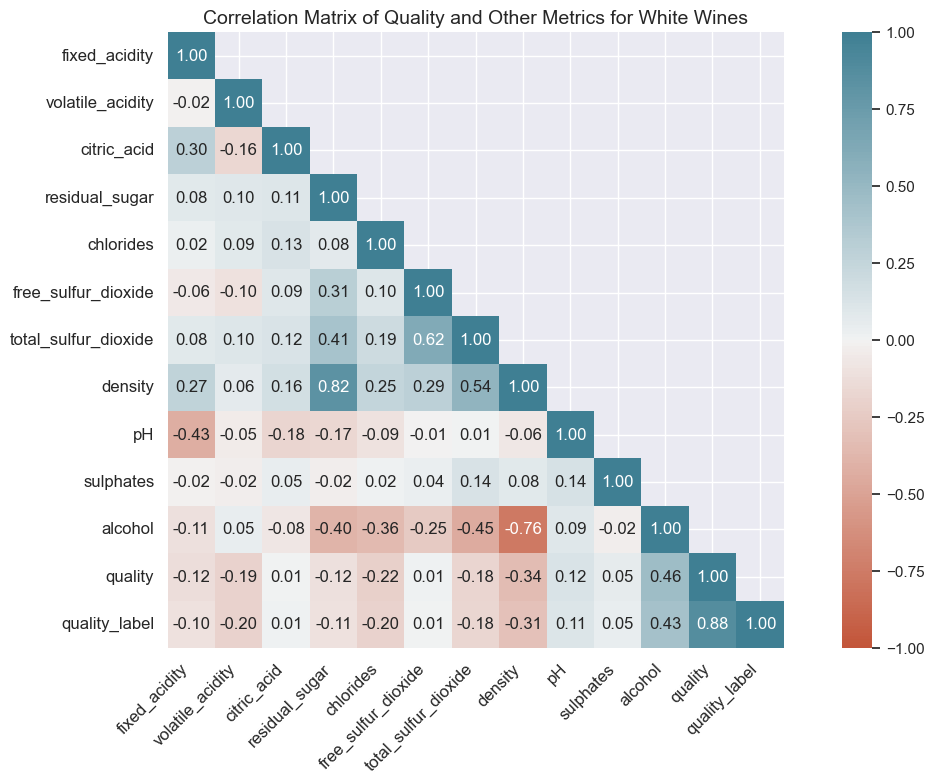

In [32]:
# create a heatmap to check relation between quality and other features

# Compute the correlation matrix

corr = df_white.corr(numeric_only=True)

# Create a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set the figure size and plot the heatmap with the mask

sns.set_theme(rc={'figure.figsize': (15, 8)})
ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200), square=True)

# Customize the tick labels and title

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Matrix of Quality and Other Metrics for White Wines', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

* The features showing the highest correlation with wine quality label are:
    * alcohol: 0.43 
    * density: -0.31
    * chlorides: -0.20
    * volatile acidity: -0.20
    * total sulfur dioxide: -0.18
    
* Since alcohol and density are highly correlated with each other(-0.76), we will retain alcohol as it has a stronger individual correlation with quality.

In [33]:
# List of features

features = ['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide', 'quality', 'quality_label']

In [34]:
df_white_ml = df_white[features].reset_index(drop=True)

In [35]:
df_white_ml.describe()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,10.589358,0.045905,0.280538,137.193512,5.854835,0.694017
std,1.217076,0.023103,0.103437,43.129065,0.890683,0.530187
min,8.000000,0.009000,0.080000,9.000000,3.000000,0.000000
25%,9.500000,0.035000,0.210000,106.000000,5.000000,0.000000
50%,10.400000,0.042000,0.260000,133.000000,6.000000,1.000000
75%,11.400000,0.050000,0.330000,166.000000,6.000000,1.000000
max,14.200000,0.346000,1.100000,440.000000,9.000000,2.000000


In [36]:
skewness = df_white_ml[features].skew()
skewness

alcohol                 0.450697
chlorides               4.969076
volatile_acidity        1.641081
total_sulfur_dioxide    0.456800
quality                 0.112004
quality_label          -0.130046
dtype: float64

In [37]:
kurtosis = df_white_ml[features].kurtosis()
kurtosis

alcohol                 -0.695980
chlorides               35.530288
volatile_acidity         5.327754
total_sulfur_dioxide     0.735258
quality                  0.299345
quality_label           -0.665517
dtype: float64

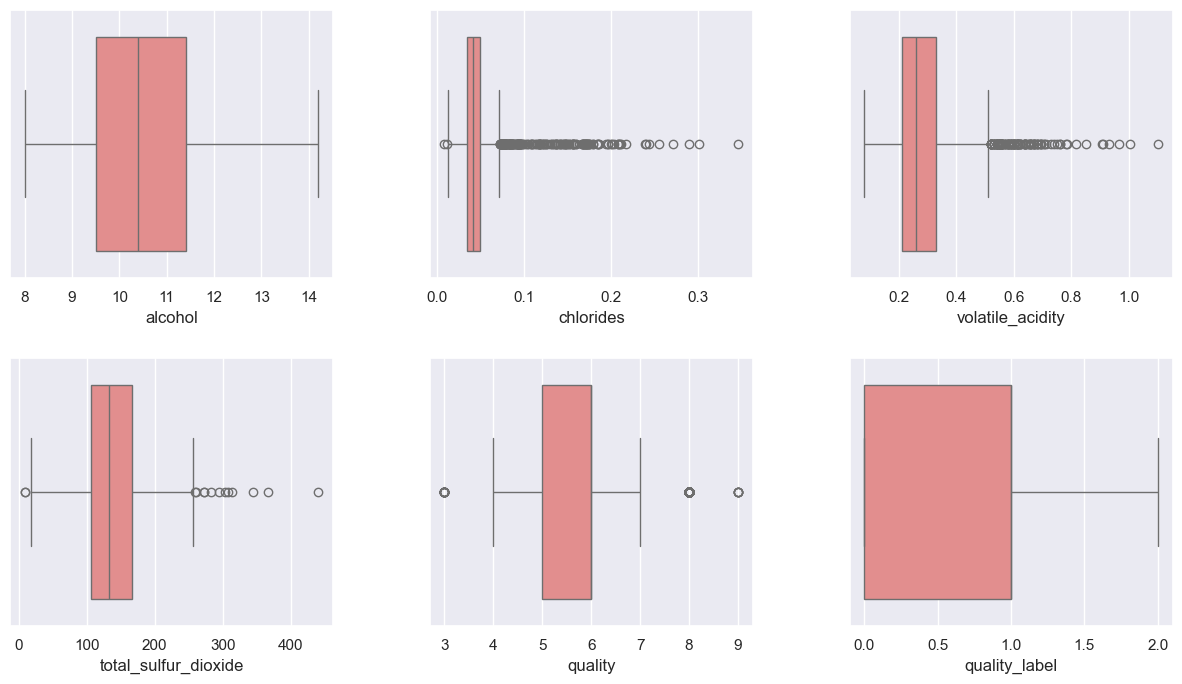

In [38]:
# Create boxplots for each feature

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x=df_white_ml[feature], color='lightcoral')

    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

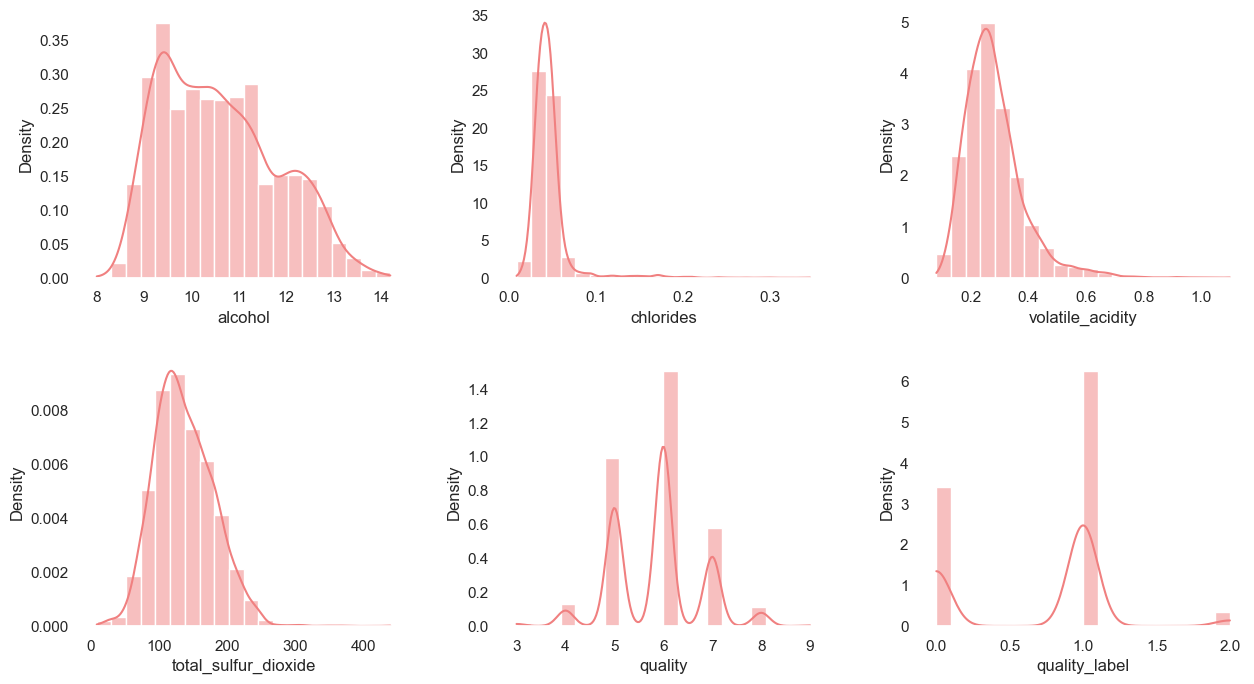

In [39]:
# check data distribution with histograms
 
plt.figure(figsize=(15, 8))

# Create histograms for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_white_ml[feature], kde=True, bins=20, color='lightcoral', stat='density')
    
# Adjust space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Set white background for the figure and axes
plt.gcf().patch.set_facecolor('white')  # Set the background of the figure
for ax in plt.gcf().get_axes():
    ax.set_facecolor('white')  # Set the background for each subplot

plt.show()

* Alcohol:
    It is slightly right-skewed, fairly symmetrical. 
    It has a moderately symmetric distribution with most values concentrated around the mean (10.59)
    No action needed

* Chlorides
    highly right-skewed, heavy-tailed distribution, 
    many low values with a few outliers, and extreme high values
    check in detail on next steps

* Volatile Acidity
    moderately right-skewed
    with most values near the mean (0.28). Values range from 0.08 to 1.1, indicating some outliers.
    check in detail 

* Total Sulfur Dioxide
    slightly right-skewed, Kurtosis: 0.73 (close to normal distribution)
    most values centered around the mean but value range is so high from 9 to 440
    check in detail 

### chloride outliers

In [40]:
df_white_ml['chlorides'].describe()

count    3961.000000
mean        0.045905
std         0.023103
min         0.009000
25%         0.035000
50%         0.042000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

In [41]:
df_white_ml['chlorides'].quantile(0.95)

0.069

In [42]:
df_white_ml['chlorides'].quantile(0.05)

0.027

In [43]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.027)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 18 to 3960
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               384 non-null    float64
 1   chlorides             384 non-null    float64
 2   volatile_acidity      384 non-null    float64
 3   total_sulfur_dioxide  384 non-null    float64
 4   quality               384 non-null    int64  
 5   quality_label         384 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 21.0 KB


In [44]:
df_filtered.head(50).T

,18,30,34,35,47,53,92,104,105,110,166,167,168,188,203,212,267,301,312,325,331,359,367,374,379,387,392,398,403,405,412,414,416,423,429,440,446,461,503,517,518,523,554,572,576,585,609,615,618,622
alcohol,9.300,12.80,9.400,9.400,9.100,8.600,8.800,9.800,11.000,10.60,9.10,9.100,9.100,9.100,11.400,9.800,9.100,9.600,10.800,10.800,12.200,9.200,12.900,9.10,12.900,8.900,12.500,9.200,9.600,9.700,11.400,12.500,12.500,8.80,11.200,9.200,9.300,11.300,9.40,9.000,9.000,9.100,9.200,9.40,9.00,11.100,12.40,9.400,11.100,10.800
chlorides,0.074,0.08,0.172,0.173,0.147,0.092,0.082,0.092,0.026,0.02,0.20,0.197,0.197,0.070,0.026,0.074,0.132,0.071,0.089,0.026,0.021,0.108,0.026,0.07,0.022,0.081,0.023,0.073,0.346,0.025,0.022,0.025,0.026,0.09,0.025,0.114,0.186,0.026,0.18,0.084,0.083,0.096,0.094,0.24,0.29,0.022,0.02,0.185,0.022,0.021
volatile_acidity,0.670,0.28,0.230,0.240,0.200,0.220,0.170,0.130,0.190,0.26,0.29,0.300,0.290,0.685,0.210,0.260,0.280,0.335,0.180,0.170,0.240,0.550,0.250,0.60,0.230,0.210,0.240,0.550,0.370,0.160,0.190,0.440,0.230,0.51,0.360,0.320,0.180,0.250,0.30,0.460,0.260,0.560,0.570,0.27,0.67,0.190,0.33,0.330,0.280,0.210
total_sulfur_dioxide,168.000,123.00,158.000,157.000,132.000,123.000,163.000,158.000,143.000,57.00,181.00,180.000,183.000,172.000,100.000,197.000,127.000,128.000,143.000,115.000,69.000,151.000,126.000,174.00,82.000,126.000,86.000,165.000,200.000,117.000,158.000,173.000,147.000,135.00,55.000,140.000,150.000,93.000,160.00,222.000,171.000,177.000,188.000,174.00,193.00,94.000,89.00,188.000,49.000,142.000
quality,5.000,5.00,6.000,6.000,6.000,6.000,6.000,6.000,6.000,5.00,5.00,6.000,5.000,6.000,7.000,3.000,6.000,6.000,6.000,7.000,6.000,4.000,8.000,5.00,7.000,5.000,6.000,6.000,5.000,6.000,6.000,6.000,6.000,5.00,6.000,6.000,5.000,7.000,6.00,5.000,5.000,4.000,4.000,5.00,4.00,6.000,8.00,5.000,7.000,7.000
quality_label,0.000,0.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.00,0.00,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,2.000,0.00,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.00,1.000,1.000,0.000,1.000,1.00,0.000,0.000,0.000,0.000,0.00,0.00,1.000,2.00,0.000,1.000,1.000


In [45]:
df_filtered['quality'].value_counts()

quality
6    165
5    120
7     63
8     16
4     15
3      3
9      2
Name: count, dtype: int64

In [46]:
df_filtered[df_filtered['quality'] == 9]


,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
688,12.4,0.021,0.36,85.0,9,2
732,12.7,0.018,0.36,119.0,9,2


In [47]:
df_filtered.sort_values(by='chlorides', ascending=True)

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
3066,13.5,0.009,0.61,100.0,5,0
2174,11.7,0.012,0.28,100.0,7,1
3159,13.5,0.013,0.65,10.0,4,0
3064,12.0,0.014,0.27,143.0,4,0
2967,12.5,0.014,0.29,89.0,7,1
...,...,...,...,...,...,...
1570,10.2,0.255,0.36,142.0,6,1
3594,9.8,0.271,0.36,140.0,5,0
576,9.0,0.290,0.67,193.0,4,0
1028,9.2,0.301,0.61,220.0,5,0


* 5th percentile includes 2 of 5 high ranking as 9, there is a considerable negative correlation between chlorides and quality which makes sense 
* instead of 5th percentile 0.027, I will define the minimum value as 0.018 to keep the 2 white wines with quality value 9.  

In [48]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.018)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 18 to 3935
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               209 non-null    float64
 1   chlorides             209 non-null    float64
 2   volatile_acidity      209 non-null    float64
 3   total_sulfur_dioxide  209 non-null    float64
 4   quality               209 non-null    int64  
 5   quality_label         209 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 11.4 KB


In [49]:
df_filtered['quality'].mean()

5.454545454545454

In [50]:
df_white_ml['quality'].mean()

5.854834637717748

In [51]:
df_white_ml['chlorides'].describe()

count    3961.000000
mean        0.045905
std         0.023103
min         0.009000
25%         0.035000
50%         0.042000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

* 209 of 3961 samples in data set(around 4%) will be removed. The quality distribution is fairly balanced, with an average quality 5.45, slightly lower than the overall average for all white wines 5.85. 

In [52]:
df_white_ml = df_white_ml[(df_white_ml['chlorides'] <= 0.069) & (df_white_ml['chlorides'] >= 0.018)].reset_index(drop=True)
df_white_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3752 non-null   float64
 1   chlorides             3752 non-null   float64
 2   volatile_acidity      3752 non-null   float64
 3   total_sulfur_dioxide  3752 non-null   float64
 4   quality               3752 non-null   int64  
 5   quality_label         3752 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 176.0 KB


In [53]:
df_white_ml['chlorides'].describe()

count    3752.000000
mean        0.042098
std         0.009695
min         0.018000
25%         0.035000
50%         0.042000
75%         0.049000
max         0.069000
Name: chlorides, dtype: float64

In [54]:
df_white_ml['chlorides'].skew()

0.15328670967948368

In [55]:
df_white_ml['chlorides'].kurtosis()

-0.2768626683841058

In [56]:
df_white_ml['quality'].mean()

5.877132196162047

* The mean decreased slightly from 0.045 to 0.042
* Standard deviation was reduced significantly from 0.023 to 0.009
* The kurtosis dropped to a slight negative value (-0.27), now indicating a more uniform, platykurtic distribution with no extreme tails.
* Skewness reduced to 0.15, which is close to a normal distribution.

## volatile_acidity outliers

* volatile acidity is caused by bacterial spoilage, producing acetic acid, which can lead to serious faults in the wine. 
* Legal limits for volatile acidity reach up to 1.2 g/L in white wines. source: https://enology.umn.edu/news/volatile-acidity-wine-making 

In [57]:
df_white_ml['volatile_acidity'].describe()

count    3752.000000
mean        0.277849
std         0.101043
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile_acidity, dtype: float64

In [58]:
df_white_ml['volatile_acidity'].quantile(0.95)

0.46

In [59]:
df_white_ml['volatile_acidity'].quantile(0.05)

0.15

In [60]:
df_filtered = df_white_ml[(df_white_ml['volatile_acidity'] > 0.46) | (df_white_ml['volatile_acidity'] < 0.15)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 12 to 3737
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               312 non-null    float64
 1   chlorides             312 non-null    float64
 2   volatile_acidity      312 non-null    float64
 3   total_sulfur_dioxide  312 non-null    float64
 4   quality               312 non-null    int64  
 5   quality_label         312 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.1 KB


In [61]:
df_filtered.head(50).T

,12,13,25,27,48,62,80,83,89,91,117,137,143,153,161,167,171,178,182,186,206,212,213,214,215,217,235,250,257,258,280,285,300,314,326,327,351,369,380,403,412,422,447,474,502,514,529,566,606,607
alcohol,9.600,12.800,10.200,9.000,10.500,9.00,9.400,9.200,9.700,11.800,9.000,11.400,8.70,12.700,9.60,10.20,9.700,10.400,8.900,9.600,10.200,9.700,9.700,9.700,9.700,9.000,8.500,12.500,10.100,10.300,9.600,11.400,10.000,10.200,9.400,10.300,9.300,9.400,9.200,12.000,10.80,9.700,9.100,10.800,10.800,9.000,10.000,9.200,9.800,9.800
chlorides,0.046,0.029,0.042,0.045,0.035,0.06,0.054,0.051,0.065,0.035,0.058,0.037,0.06,0.034,0.05,0.04,0.051,0.046,0.062,0.044,0.048,0.043,0.044,0.045,0.044,0.057,0.066,0.032,0.040,0.041,0.050,0.044,0.048,0.031,0.049,0.044,0.048,0.039,0.043,0.039,0.05,0.048,0.066,0.030,0.027,0.050,0.047,0.044,0.051,0.047
volatile_acidity,0.480,0.660,0.140,0.120,0.470,0.54,0.120,0.130,0.485,0.140,0.595,0.480,0.67,0.530,0.54,0.57,0.130,0.495,0.640,0.520,0.115,0.580,0.585,0.590,0.600,0.580,0.590,0.550,0.125,0.100,0.145,0.120,0.905,0.550,0.490,0.140,0.520,0.140,0.470,0.620,0.13,0.100,0.510,0.475,0.140,0.105,0.140,0.470,0.140,0.130
total_sulfur_dioxide,99.000,75.000,47.000,117.000,151.000,105.00,162.000,109.000,103.000,85.000,97.000,100.000,108.00,109.000,236.00,77.00,122.000,140.000,142.000,221.000,108.000,149.000,145.000,147.000,147.000,123.000,182.000,164.000,69.000,65.000,131.000,146.000,204.000,125.000,125.000,116.000,245.000,141.000,172.000,152.000,78.00,103.000,165.000,131.000,140.000,146.000,173.000,98.000,136.000,134.000
quality,6.000,8.000,6.000,6.000,5.000,5.00,5.000,6.000,4.000,6.000,4.000,4.000,4.00,8.000,5.00,5.00,6.000,6.000,4.000,6.000,6.000,5.000,6.000,6.000,5.000,5.000,3.000,8.000,6.000,7.000,6.000,7.000,5.000,6.000,5.000,6.000,6.000,6.000,5.000,6.000,6.00,6.000,5.000,5.000,6.000,6.000,6.000,5.000,7.000,7.000
quality_label,1.000,2.000,1.000,1.000,0.000,0.00,0.000,1.000,0.000,1.000,0.000,0.000,0.00,2.000,0.00,0.00,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,2.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.00,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000


In [62]:
df_filtered['quality'].mean()

5.727564102564102

In [63]:
df_white_ml['quality'].mean()

5.877132196162047

In [64]:
df_white_ml['quality'].value_counts()

quality
6    1707
5    1076
7     678
4     140
8     128
3      18
9       5
Name: count, dtype: int64

In [65]:
df_filtered['quality'].value_counts()

quality
6    120
5     84
7     57
4     35
8     12
3      4
Name: count, dtype: int64

* 312 of 3752 samples have volatile acidity values are not between 5th and the 95th percentile. 
* The average quality of these samples is 5.72 which is close to current average 5.87.
* I will remove the rows that fall outside these percentiles to create a more refined and balanced dataset for the ML model. 

In [66]:
df_white_ml = df_white_ml[(df_white_ml['volatile_acidity'] <= 0.46) & (df_white_ml['volatile_acidity'] >= 0.15)].reset_index(drop=True)
df_white_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3440 non-null   float64
 1   chlorides             3440 non-null   float64
 2   volatile_acidity      3440 non-null   float64
 3   total_sulfur_dioxide  3440 non-null   float64
 4   quality               3440 non-null   int64  
 5   quality_label         3440 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 161.4 KB


In [67]:
df_white_ml['volatile_acidity'].describe()

count    3440.000000
mean        0.269286
std         0.071567
min         0.150000
25%         0.210000
50%         0.260000
75%         0.320000
max         0.460000
Name: volatile_acidity, dtype: float64

In [68]:
df_white_ml['volatile_acidity'].skew()

0.5126691426818939

In [69]:
df_white_ml['volatile_acidity'].kurtosis()

-0.28823615133752956

* the volatile_acidity feature is now more normally distributed

## total_sulfur_dioxide outliers

In [70]:
df_white_ml['total_sulfur_dioxide'].describe()

count    3440.000000
mean      137.827616
std        42.615286
min        18.000000
25%       107.000000
50%       133.000000
75%       167.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64

In [71]:
df_white_ml['total_sulfur_dioxide'].quantile(0.95)

212.0

In [72]:
df_white_ml['total_sulfur_dioxide'].quantile(0.05)

74.0

In [73]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.027)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 87 to 3439
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               163 non-null    float64
 1   chlorides             163 non-null    float64
 2   volatile_acidity      163 non-null    float64
 3   total_sulfur_dioxide  163 non-null    float64
 4   quality               163 non-null    int64  
 5   quality_label         163 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 8.9 KB


In [74]:
df_filtered = df_white_ml[(df_white_ml['total_sulfur_dioxide'] > 212) | (df_white_ml['total_sulfur_dioxide'] < 74)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 6 to 3429
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               333 non-null    float64
 1   chlorides             333 non-null    float64
 2   volatile_acidity      333 non-null    float64
 3   total_sulfur_dioxide  333 non-null    float64
 4   quality               333 non-null    int64  
 5   quality_label         333 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 18.2 KB


In [75]:
df_filtered['quality'].value_counts()

quality
6    151
5    125
7     26
4     23
3      5
8      3
Name: count, dtype: int64

In [76]:
df_filtered[df_filtered['quality'] == 3]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
316,11.5,0.038,0.32,66.0,3,0
543,12.6,0.022,0.39,19.0,3,0
634,9.6,0.037,0.17,33.0,3,0
1223,9.4,0.041,0.25,216.0,3,0
3327,10.5,0.047,0.26,440.0,3,0


In [77]:
df_white_ml['quality'].value_counts()

quality
6    1587
5     992
7     621
8     116
4     105
3      14
9       5
Name: count, dtype: int64

In [78]:
df_white_ml[df_white_ml['quality'] == 3]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
180,11.7,0.029,0.240,109.0,3,0
316,11.5,0.038,0.320,66.0,3,0
543,12.6,0.022,0.390,19.0,3,0
634,9.6,0.037,0.170,33.0,3,0
893,12.4,0.033,0.330,96.0,3,0
1072,9.1,0.053,0.320,134.0,3,0
1223,9.4,0.041,0.250,216.0,3,0
1473,9.7,0.034,0.230,123.0,3,0
2184,10.1,0.041,0.200,201.0,3,0
2313,8.0,0.041,0.215,157.0,3,0


In [79]:
df_white_ml[df_white_ml['quality'] == 4]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
32,9.80,0.063,0.450,206.0,4,0
72,10.10,0.038,0.360,83.0,4,0
129,12.60,0.044,0.320,65.0,4,0
140,8.90,0.047,0.280,210.0,4,0
148,10.20,0.053,0.280,114.0,4,0
...,...,...,...,...,...,...
3136,9.55,0.058,0.280,108.0,4,0
3153,11.50,0.034,0.260,129.0,4,0
3349,11.20,0.045,0.240,132.0,4,0
3366,12.10,0.033,0.350,65.0,4,0


In [80]:
df_filtered['quality'].mean()

5.5375375375375375

* I hesitated to remove these outliers because 5 out of 14 entries had a quality value of 3, and approximately 25% of the entries had a quality value of 4.
* However, the distribution of the quality values is quite inconsistent, so I will proceed by removing values outside the 5th and 95th percentiles.

In [81]:
df_white_ml = df_white_ml[(df_white_ml['total_sulfur_dioxide'] <= 212) & (df_white_ml['total_sulfur_dioxide'] >= 74)].reset_index(drop=True)
df_white_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3107 non-null   float64
 1   chlorides             3107 non-null   float64
 2   volatile_acidity      3107 non-null   float64
 3   total_sulfur_dioxide  3107 non-null   float64
 4   quality               3107 non-null   int64  
 5   quality_label         3107 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 145.8 KB


In [82]:
df_white_ml.head()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
0,8.8,0.045,0.27,170.0,6,1
1,9.5,0.049,0.30,132.0,6,1
2,10.1,0.050,0.28,97.0,6,1
3,9.9,0.058,0.23,186.0,6,1
4,9.6,0.045,0.32,136.0,6,1


In [83]:
df_white_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,3107.0,10.661725,1.197871,8.000,9.700,10.500,11.500,14.200
chlorides,3107.0,0.042132,0.009676,0.018,0.035,0.042,0.049,0.069
volatile_acidity,3107.0,0.268225,0.071239,0.150,0.210,0.260,0.310,0.460
total_sulfur_dioxide,3107.0,136.794979,34.163052,74.000,110.000,133.000,163.000,212.000
quality,3107.0,5.928548,0.870223,3.000,5.000,6.000,6.000,9.000
quality_label,3107.0,0.729643,0.522790,0.000,0.000,1.000,1.000,2.000


In [84]:
df_white_ml['total_sulfur_dioxide'].skew()

0.2497089004877891

In [85]:
df_white_ml['total_sulfur_dioxide'].kurtosis()

-0.8551844931716293

* total_sulfur_dioxide is now more symmetric and has less variable distribution. 

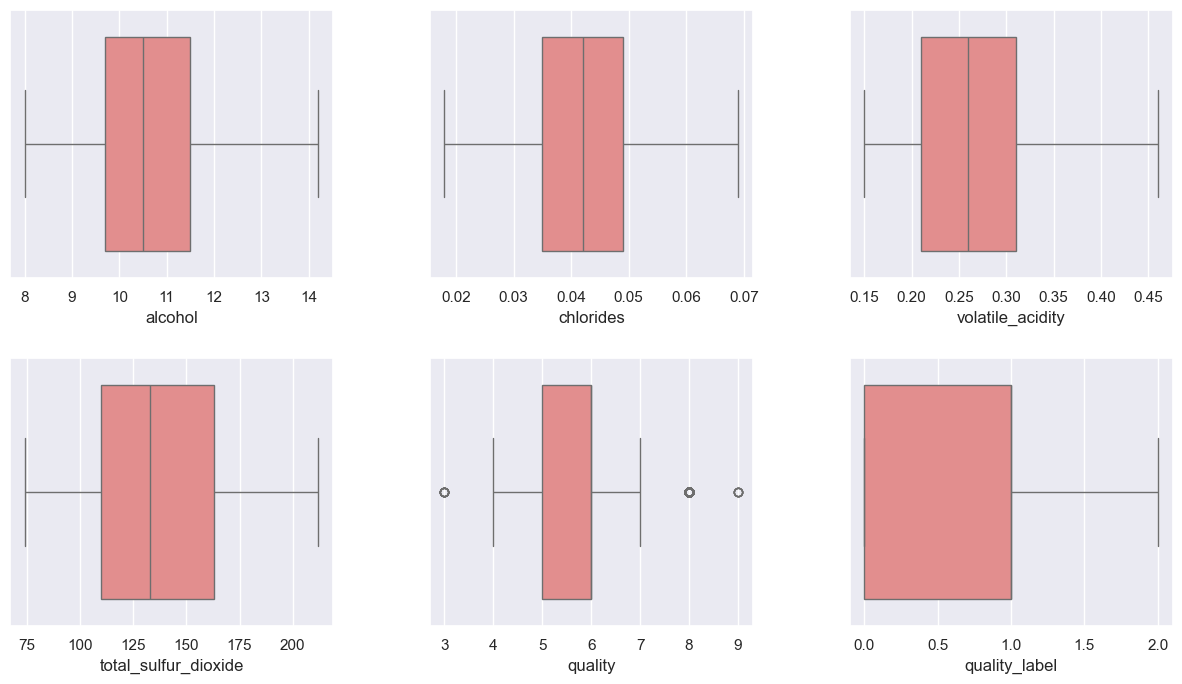

In [86]:
# Create boxplots for each feature

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 1 row, 5 columns, plot by index
    sns.boxplot(x=df_white_ml[feature], color='lightcoral')

    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

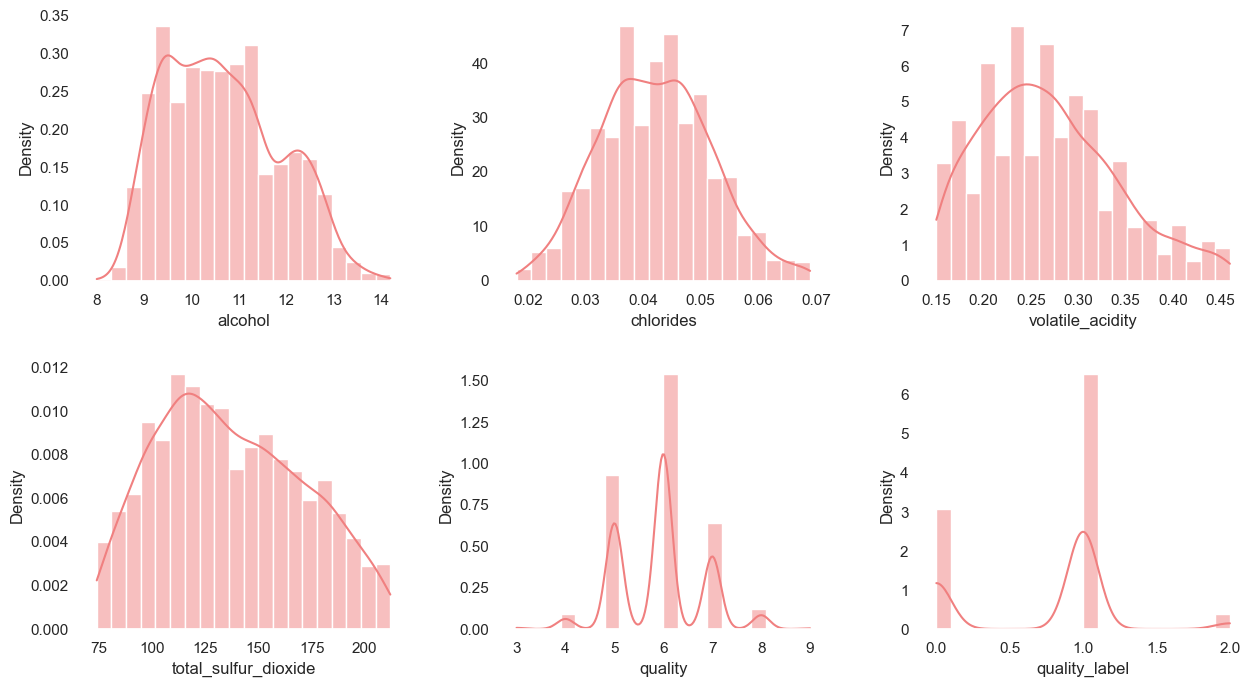

In [87]:
plt.figure(figsize=(15, 8))

# Create histograms for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_white_ml[feature], kde=True, bins=20, color='lightcoral', stat='density')
    
# Adjust space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Set white background for the figure and axes
plt.gcf().patch.set_facecolor('white')  # Set the background of the figure
for ax in plt.gcf().get_axes():
    ax.set_facecolor('white')  # Set the background for each subplot

plt.show()

* A total of 854 out of 3,961 entries were removed, which is approximately 21.6% of all entries. This was done to create a more refined and balanced dataset for the ML model, reducing the influence of extreme outliers.
* 21% of all entries being removed is much more than I expected, especially considering my intention to retain as many samples as possible, anyway it is the final features and entries to train and test, I will try same models with outliers to compare how different models result with and without outliers

# 3: Feature Verification and Hypothesis Testing

* Multicollinearity, data distribution and outliers have already been reviewed on previous steps. Now, I am jumping to ANOVA Tests to confirm if these features have a statistically significant effect on wine quality before proceeding with scaling and training the data.

### Anova Test

In [88]:
# Apply ANOVA for each feature
anova_results = {}
for feature in ['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']:
    groups = [df_white_ml[df_white_ml['quality_label'] == label][feature] for label in df_white_ml['quality_label'].unique()]
    anova_results[feature] = f_oneway(*groups)

for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result.statistic:.3f}, p-value = {result.pvalue:.3f}")


alcohol: F-statistic = 362.805, p-value = 0.000
chlorides: F-statistic = 143.852, p-value = 0.000
volatile_acidity: F-statistic = 37.373, p-value = 0.000
total_sulfur_dioxide: F-statistic = 76.701, p-value = 0.000


All four features have significant F-statistics and p-values, confirming features can be used in model training.

# 4: Class Balancing

Since I am planing to test classification ml models on this data set and compare their performance, I will balance the data classes with SMOTE. 
Because When data distribution on categories are unbalanced, some models will ignore minor classes(in our case high quality wines) and focus on major classes. 

In [89]:
df_white_ml

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
0,8.8,0.045,0.27,170.0,6,1
1,9.5,0.049,0.30,132.0,6,1
2,10.1,0.050,0.28,97.0,6,1
3,9.9,0.058,0.23,186.0,6,1
4,9.6,0.045,0.32,136.0,6,1
...,...,...,...,...,...,...
3102,11.2,0.039,0.21,92.0,6,1
3103,9.6,0.047,0.32,168.0,5,0
3104,9.4,0.041,0.24,111.0,6,1
3105,12.8,0.022,0.29,110.0,7,1


In [90]:
df_white_ml['quality_label'].value_counts()

quality_label
1    2031
0     958
2     118
Name: count, dtype: int64

In [91]:
# Define a list of features to try different feature combinations faster 

selected_features = ['alcohol', 'chlorides', 'total_sulfur_dioxide', 'volatile_acidity' ]

### Train-Test Split

In [92]:
# Define the features (X) and target (y)
X = df_white_ml[selected_features]
y = df_white_ml['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [94]:
y_train.value_counts()

quality_label
1    1621
0     771
2      93
Name: count, dtype: int64

In [95]:
y_train_smote.value_counts()

quality_label
0    1621
1    1621
2    1621
Name: count, dtype: int64

# 5: Model 1: Logistic Regression

In [96]:
# Step 1: Scale the data
scaler = StandardScaler()

# Scale training data (SMOTE-applied) and test data
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [97]:
# Step 2: Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Step 3: Fit the model on the SMOTE-applied, scaled training data
log_reg.fit(X_train_smote_scaled, y_train_smote)

# Step 4: Predict on the scaled test data
y_pred = log_reg.predict(X_test_scaled)

# Step 5: Evaluate the model
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.5016077170418006

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.71      0.60       187
           1       0.78      0.39      0.52       410
           2       0.11      0.72      0.20        25

    accuracy                           0.50       622
   macro avg       0.47      0.61      0.44       622
weighted avg       0.68      0.50      0.53       622


Confusion Matrix:
[[133  39  15]
 [123 161 126]
 [  1   6  18]]


* Accuracy: 0,50 - moderate
* Precision:  low precision for high-quality and high precision for medium quality 
* Recall: medium-quality wines are often misclassified
* F1-score: fvery low for high quality wines(0.20)
* Confusion Matrix: many false positives on each category

In [98]:
# create an empty DataFrame to store results

results = pd.DataFrame(columns=['model', 'accuracy', 'pre_low', 'recall_low', 'f1_low',
                               'pre_med', 'recall_med', 'f1_med', 'pre_high', 'recall_high', 'f1_high']).copy()


results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high


In [99]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Logistic Regression'],
    'accuracy': [0.501],
    'pre_low': [0.52],
    'recall_low': [0.71],
    'f1_low': [0.60],
    'pre_med': [0.78],
    'recall_med': [0.39],
    'f1_med': [0.52],
    'pre_high': [0.11],
    'recall_high': [0.72],
    'f1_high': [0.20]
})], ignore_index=True)

results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high
0,Logistic Regression,0.501,0.52,0.71,0.6,0.78,0.39,0.52,0.11,0.72,0.2


# 6: Model 2: Decision Trees

In [100]:
# Initialize the Decision Tree classifier model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Fit the model on the SMOTE-transformed training data
dt_model.fit(X_train_smote, y_train_smote)  # Use the SMOTE data here (before scaling)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)  # Use the scaled X_test data for predictions

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

# Classification Report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nConfusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy of Decision Tree: 0.5064308681672026

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.56      0.67      0.61       187
           1       0.78      0.42      0.55       410
           2       0.09      0.64      0.16        25

    accuracy                           0.51       622
   macro avg       0.48      0.58      0.44       622
weighted avg       0.68      0.51      0.55       622


Confusion Matrix for Decision Tree:
[[126  40  21]
 [100 173 137]
 [  0   9  16]]


In [101]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Decision Tree'],
    'accuracy': [0.506],
    'pre_low': [0.56],
    'recall_low': [0.67],
    'f1_low': [0.61],
    'pre_med': [0.78],
    'recall_med': [0.42],
    'f1_med': [0.55],
    'pre_high': [0.09],
    'recall_high': [0.64],
    'f1_high': [0.16]
})], ignore_index=True)

results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high
0,Logistic Regression,0.501,0.52,0.71,0.60,0.78,0.39,0.52,0.11,0.72,0.20
1,Decision Tree,0.506,0.56,0.67,0.61,0.78,0.42,0.55,0.09,0.64,0.16


* Both models have similar accuracy at around 0.50, neither model performs exceptionally well overall.
* Decision Tree has slightly better overall performance

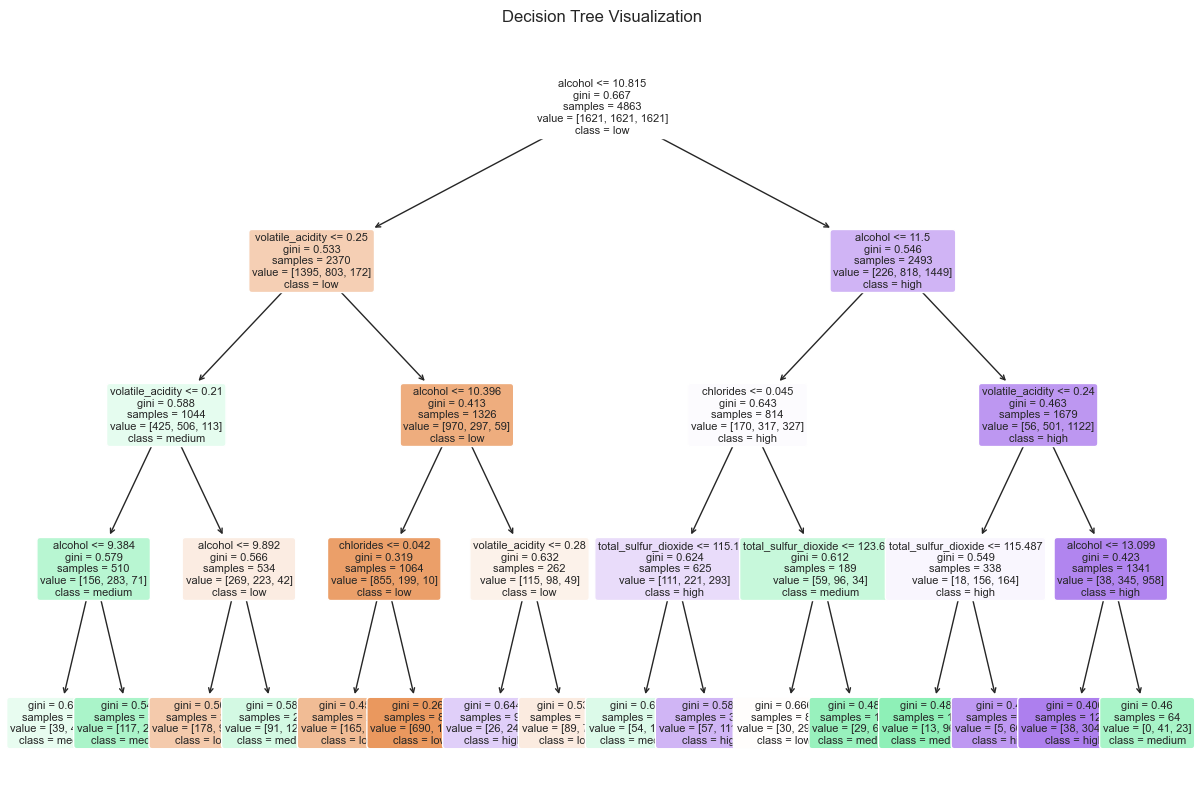

In [102]:
# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=['low', 'medium', 'high'], rounded=True, fontsize=8)
plt.title('Decision Tree Visualization')
plt.show()

# 7: Model 3: Random Forests

In [ ]:
# Define the features (X) and target (y)
X = df_white_ml[selected_features]
y = df_white_ml['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Initialize the Random Forest Classifier 
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the SMOTE data
rf_model.fit(X_train_smote, y_train_smote)  

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)  

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy of Random Forest: 0.6559485530546624

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       187
           1       0.77      0.71      0.74       410
           2       0.14      0.24      0.18        25

    accuracy                           0.66       622
   macro avg       0.49      0.51      0.50       622
weighted avg       0.68      0.66      0.67       622


Confusion Matrix for Random Forest:
[[111  69   7]
 [ 90 291  29]
 [  1  18   6]]


In [104]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Random Forest'],
    'accuracy': [0.656],
    'pre_low': [0.55],
    'recall_low': [0.59],
    'f1_low': [0.57],
    'pre_med': [0.77],
    'recall_med': [0.71],
    'f1_med': [0.74],
    'pre_high': [0.14],
    'recall_high': [0.24],
    'f1_high': [0.18]
})], ignore_index=True)

results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high
0,Logistic Regression,0.501,0.52,0.71,0.60,0.78,0.39,0.52,0.11,0.72,0.20
1,Decision Tree,0.506,0.56,0.67,0.61,0.78,0.42,0.55,0.09,0.64,0.16
2,Random Forest,0.656,0.55,0.59,0.57,0.77,0.71,0.74,0.14,0.24,0.18


* Good  improvement in accuracy (0.65), especially for medium-quality wines.
* Overall performance is solid for medium quality wines, but other 2, essipecially high quality wines are low at precison.  

# 8: Model 4: Gradient Boosting

In [105]:
# Initialize and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_model.fit(X_train_smote, y_train_smote)  

# Predict on the test data 
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nAccuracy of Gradient Boosting:", accuracy_gb)

# Classification Report for Gradient Boosting
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
print("\nConfusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))


Accuracy of Gradient Boosting: 0.6318327974276527

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       187
           1       0.77      0.65      0.71       410
           2       0.12      0.32      0.17        25

    accuracy                           0.63       622
   macro avg       0.49      0.54      0.49       622
weighted avg       0.68      0.63      0.65       622


Confusion Matrix for Gradient Boosting:
[[119  61   7]
 [ 92 266  52]
 [  0  17   8]]


In [106]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Gradient Boosting'],
    'accuracy': [0.631],
    'pre_low': [0.56],
    'recall_low': [0.64],
    'f1_low': [0.60],
    'pre_med': [0.77],
    'recall_med': [0.65],
    'f1_med': [0.71],
    'pre_high': [0.12],
    'recall_high': [0.32],
    'f1_high': [0.17]
})], ignore_index=True)

results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high
0,Logistic Regression,0.501,0.52,0.71,0.60,0.78,0.39,0.52,0.11,0.72,0.20
1,Decision Tree,0.506,0.56,0.67,0.61,0.78,0.42,0.55,0.09,0.64,0.16
2,Random Forest,0.656,0.55,0.59,0.57,0.77,0.71,0.74,0.14,0.24,0.18
3,Gradient Boosting,0.631,0.56,0.64,0.60,0.77,0.65,0.71,0.12,0.32,0.17


* Gradient Boosting results are also much beter compared to first 2 models.
* Precision for high-quality wines is poor for all models 
* F1-Score for medium quality wines is the highest across all models

# 9: Model Selection & Hyperparameter Tuning

* Gradient Boosting is more sensitive to hyperparameters and likely to benefit more from cross-validation than Random Forest
* But Random Forest has similar overall results so I will check if hyperpamater tuning will improve any of these 2 models.  
* Continue with hyperparameter tuning on Gradient Boosting and Random Forest Models

### Random Forest

In [107]:
# Define the parameter grid for RandomizedSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],           # Number of trees
    'max_depth': [5, 10, 20, 30, None],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                   # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],          # Number of features for the best split
    'bootstrap': [True, False]                       # Whether to use bootstrap samples
}

In [108]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,         # Number of random combinations to sample (adjust n_iter for faster execution)
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',# Optimize for accuracy
    n_jobs=-1,         # Use all available cores
    verbose=2,         # Show progress of the search
    random_state=42    # Ensures reproducibility
)

# Start the timer for RandomizedSearchCV
start_time = time.time()

# Fit the RandomizedSearchCV to the SMOTE data
random_search_rf.fit(X_train_smote, y_train_smote)

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Random Forest RandomizedSearchCV: {elapsed_time / 60:.1f} minutes")

# Get the best model from RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

# Predict on the test data using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy of Tuned Random Forest:", accuracy_rf)

# Classification Report for Random Forest
print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
print("\nConfusion Matrix for Tuned Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Time taken for Random Forest RandomizedSearchCV: 3.0 minutes
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Accuracy of Tuned Random Forest: 0.6607717041800643

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       187
           1       0.77      0.71      0.74       410
           2       0.15      0.20      0.17        25

    accuracy                           0.66       622
   macro avg       0.49      0.51      0.49       622
weighted avg       0.68      0.66      0.67       622


Confusion Matrix for Tuned Random Forest:
[[113  69   5]
 [ 93 293  24]
 [  1  19   5]]


In [109]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Random Forest Tuned'],
    'accuracy': [0.660],
    'pre_low': [0.55],
    'recall_low': [0.60],
    'f1_low': [0.57],
    'pre_med': [0.77],
    'recall_med': [0.71],
    'f1_med': [0.74],
    'pre_high': [0.15],
    'recall_high': [0.20],
    'f1_high': [0.17]
})], ignore_index=True)

results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high
0,Logistic Regression,0.501,0.52,0.71,0.60,0.78,0.39,0.52,0.11,0.72,0.20
1,Decision Tree,0.506,0.56,0.67,0.61,0.78,0.42,0.55,0.09,0.64,0.16
2,Random Forest,0.656,0.55,0.59,0.57,0.77,0.71,0.74,0.14,0.24,0.18
3,Gradient Boosting,0.631,0.56,0.64,0.60,0.77,0.65,0.71,0.12,0.32,0.17
4,Random Forest Tuned,0.660,0.55,0.60,0.57,0.77,0.71,0.74,0.15,0.20,0.17


* A small improvement in accuracy, but hyperparameter tuning did not really change results much. 
* Despite using SMOTE to balance the data in this model, the class imbalance may still impact performance, as the model still struggles to predict the high quality wines.

### Gradient Boosting

In [110]:
# Define the parameter grid for RandomizedSearchCV for Gradient Boosting

param_grid_gb = {
    'n_estimators': [100, 200, 300, 500],         # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      # Learning rate (step size for shrinking)
    'max_depth': [3, 5, 7, 10],                    # Max depth of individual estimators
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples required at each leaf node
    'subsample': [0.6, 0.8, 1.0],                  # Fraction of samples used for fitting each tree
    'max_features': ['sqrt', 'log2', None]         # Number of features for the best split
}


In [111]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid_gb,  # Updated parameter grid
    n_iter=30,                         # Number of random combinations to sample (increase if needed)
    cv=5,                              # 5-fold cross-validation
    scoring='accuracy',                # Optimize for accuracy
    n_jobs=-1,                         # Use all available cores
    verbose=2,                         # Show progress of the search
    random_state=42                    # Ensures reproducibility
)

# Start the timer for RandomizedSearchCV
start_time = time.time()

# Fit the RandomizedSearchCV to the SMOTE data
random_search_gb.fit(X_train_smote, y_train_smote)

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Gradient Boosting RandomizedSearchCV: {elapsed_time / 60:.1f} minutes")

# Get the best model from RandomizedSearchCV
best_gb_model = random_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)

# Predict on the test data using the best model
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the best model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nAccuracy of Tuned Gradient Boosting:", accuracy_gb)

# Classification Report for Gradient Boosting
print("\nClassification Report for Tuned Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
print("\nConfusion Matrix for Tuned Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Time taken for Gradient Boosting RandomizedSearchCV: 5.5 minutes
Best Parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.1}

Accuracy of Tuned Gradient Boosting: 0.6945337620578779

Classification Report for Tuned Gradient Boosting:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       187
           1       0.76      0.79      0.77       410
           2       0.28      0.20      0.23        25

    accuracy                           0.69       622
   macro avg       0.54      0.51      0.52       622
weighted avg       0.69      0.69      0.69       622


Confusion Matrix for Tuned Gradient Boosting:
[[104  82   1]
 [ 75 323  12]
 [  0  20   5]]


In [112]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Gradient Boosting Tuned'],
    'accuracy': [0.694],
    'pre_low': [0.58],
    'recall_low': [0.56],
    'f1_low': [0.57],
    'pre_med': [0.76],
    'recall_med': [0.79],
    'f1_med': [0.77],
    'pre_high': [0.28],
    'recall_high': [0.20],
    'f1_high': [0.23]
})], ignore_index=True)

results = results.sort_values(by='accuracy', ascending=False).reset_index(drop= True)

results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high
0,Gradient Boosting Tuned,0.694,0.58,0.56,0.57,0.76,0.79,0.77,0.28,0.20,0.23
1,Random Forest Tuned,0.660,0.55,0.60,0.57,0.77,0.71,0.74,0.15,0.20,0.17
2,Random Forest,0.656,0.55,0.59,0.57,0.77,0.71,0.74,0.14,0.24,0.18
3,Gradient Boosting,0.631,0.56,0.64,0.60,0.77,0.65,0.71,0.12,0.32,0.17
4,Decision Tree,0.506,0.56,0.67,0.61,0.78,0.42,0.55,0.09,0.64,0.16
5,Logistic Regression,0.501,0.52,0.71,0.60,0.78,0.39,0.52,0.11,0.72,0.20


* Tuning Gradient Boosting improved its accuracy from 0.63 to 0.69, but it is still not good about prediticting high quality wines
* I am wondering if another sampling method instead of SMOTE would give better results.
* try with ADASYN (Adaptive Synthetic Sampling)which will focus on generating synthetic samples for the minority class  

### ADASYN resampling

In [113]:
df_white_ml['quality_label'].value_counts()

quality_label
1    2031
0     958
2     118
Name: count, dtype: int64

In [114]:
# Define the features (X) and target (y)
X = df_white_ml[selected_features]
y = df_white_ml['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize ADASYN to handle the class imbalance
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the balance of classes after resampling
print("Class distribution after ADASYN resampling:")
print(y_train_resampled.value_counts())

Class distribution after ADASYN resampling:
quality_label
1    1621
2    1611
0     771
Name: count, dtype: int64


In [115]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid_gb,  # Updated parameter grid
    n_iter=30,                         # Number of random combinations to sample (increase if needed)
    cv=5,                              # 5-fold cross-validation
    scoring='accuracy',                # Optimize for accuracy
    n_jobs=-1,                         # Use all available cores
    verbose=2,                         # Show progress of the search
    random_state=42                    # Ensures reproducibility
)

# Start the timer for RandomizedSearchCV
start_time = time.time()

# Fit the RandomizedSearchCV to the SMOTE data
random_search_gb.fit(X_train_resampled, y_train_resampled)

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Gradient Boosting RandomizedSearchCV: {elapsed_time / 60:.1f} minutes")

# Get the best model from RandomizedSearchCV
best_gb_model = random_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)

# Predict on the test data using the best model
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the best model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nAccuracy of Tuned Gradient Boosting:", accuracy_gb)

# Classification Report for Gradient Boosting
print("\nClassification Report for Tuned Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
print("\nConfusion Matrix for Tuned Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Time taken for Gradient Boosting RandomizedSearchCV: 4.4 minutes
Best Parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}

Accuracy of Tuned Gradient Boosting: 0.6977491961414791

Classification Report for Tuned Gradient Boosting:
              precision    recall  f1-score   support

           0       0.60      0.52      0.55       187
           1       0.76      0.81      0.78       410
           2       0.22      0.16      0.19        25

    accuracy                           0.70       622
   macro avg       0.52      0.50      0.51       622
weighted avg       0.69      0.70      0.69       622


Confusion Matrix for Tuned Gradient Boosting:
[[ 97  88   2]
 [ 65 333  12]
 [  1  20   4]]


In [116]:
results = pd.concat([results, pd.DataFrame({
    'model': ['G.B Tuned(ADASYN)'],
    'accuracy': [0.697],
    'pre_low': [0.60],
    'recall_low': [0.52],
    'f1_low': [0.55],
    'pre_med': [0.76],
    'recall_med': [0.81],
    'f1_med': [0.78],
    'pre_high': [0.22],
    'recall_high': [0.16],
    'f1_high': [0.19]
})], ignore_index=True)

results = results.sort_values(by='accuracy', ascending=False).reset_index(drop= True)

results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high
0,G.B Tuned(ADASYN),0.697,0.60,0.52,0.55,0.76,0.81,0.78,0.22,0.16,0.19
1,Gradient Boosting Tuned,0.694,0.58,0.56,0.57,0.76,0.79,0.77,0.28,0.20,0.23
2,Random Forest Tuned,0.660,0.55,0.60,0.57,0.77,0.71,0.74,0.15,0.20,0.17
3,Random Forest,0.656,0.55,0.59,0.57,0.77,0.71,0.74,0.14,0.24,0.18
4,Gradient Boosting,0.631,0.56,0.64,0.60,0.77,0.65,0.71,0.12,0.32,0.17
5,Decision Tree,0.506,0.56,0.67,0.61,0.78,0.42,0.55,0.09,0.64,0.16
6,Logistic Regression,0.501,0.52,0.71,0.60,0.78,0.39,0.52,0.11,0.72,0.20


* The ADASYN resampling did not make a noticable change on results, so small increase in accuracy. 
* Model is still underperforming for the high quality class.

# 10: Cross-validation

* I keep using  X_train_resampled y_train_resampled from ADSYN resampling for Cross-validation

In [117]:
# Define the Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the Gradient Boosting model with tuned hyperparameters 
best_gb_model = random_search_gb.best_estimator_

# Define custom scorer for F1 and Recall
f1_scorer = make_scorer(f1_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation and calculate F1, Recall, and Accuracy
cv_f1_scores = cross_val_score(best_gb_model, X_train_resampled, y_train_resampled, cv=cv, scoring=f1_scorer)
cv_recall_scores = cross_val_score(best_gb_model, X_train_resampled, y_train_resampled, cv=cv, scoring=recall_scorer)
cv_accuracy_scores = cross_val_score(best_gb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print out the cross-validation results
print(f"Cross-Validation Results for Gradient Boosting with ADASYN resampling:")
print(f"Average Accuracy: {np.mean(cv_accuracy_scores):.4f} (+/- {np.std(cv_accuracy_scores):.4f})")
print(f"Average F1-Score: {np.mean(cv_f1_scores):.4f} (+/- {np.std(cv_f1_scores):.4f})")
print(f"Average Recall: {np.mean(cv_recall_scores):.4f} (+/- {np.std(cv_recall_scores):.4f})")

# For each fold, also display the results for accuracy, F1, and recall
for fold, (train_idx, test_idx) in enumerate(cv.split(X_train_resampled, y_train_resampled)):
    X_train_cv, X_test_cv = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[test_idx]
    y_train_cv, y_test_cv = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[test_idx]
    
    best_gb_model.fit(X_train_cv, y_train_cv)
    y_pred = best_gb_model.predict(X_test_cv)
    
    fold_accuracy = accuracy_score(y_test_cv, y_pred)
    fold_f1 = f1_score(y_test_cv, y_pred, average='weighted')
    fold_recall = recall_score(y_test_cv, y_pred, average='weighted')
    
    print(f"Fold {fold + 1} - Accuracy: {fold_accuracy:.4f}, F1-Score: {fold_f1:.4f}, Recall: {fold_recall:.4f}")

Cross-Validation Results for Gradient Boosting with ADASYN resampling:
Average Accuracy: 0.8079 (+/- 0.0069)
Average F1-Score: 0.8036 (+/- 0.0071)
Average Recall: 0.8079 (+/- 0.0069)
Fold 1 - Accuracy: 0.8127, F1-Score: 0.8086, Recall: 0.8127
Fold 2 - Accuracy: 0.8027, F1-Score: 0.7955, Recall: 0.8027
Fold 3 - Accuracy: 0.8052, F1-Score: 0.8016, Recall: 0.8052
Fold 4 - Accuracy: 0.8187, F1-Score: 0.8147, Recall: 0.8187
Fold 5 - Accuracy: 0.8000, F1-Score: 0.7975, Recall: 0.8000


In [118]:
results

,model,accuracy,pre_low,recall_low,f1_low,pre_med,recall_med,f1_med,pre_high,recall_high,f1_high
0,G.B Tuned(ADASYN),0.697,0.60,0.52,0.55,0.76,0.81,0.78,0.22,0.16,0.19
1,Gradient Boosting Tuned,0.694,0.58,0.56,0.57,0.76,0.79,0.77,0.28,0.20,0.23
2,Random Forest Tuned,0.660,0.55,0.60,0.57,0.77,0.71,0.74,0.15,0.20,0.17
3,Random Forest,0.656,0.55,0.59,0.57,0.77,0.71,0.74,0.14,0.24,0.18
4,Gradient Boosting,0.631,0.56,0.64,0.60,0.77,0.65,0.71,0.12,0.32,0.17
5,Decision Tree,0.506,0.56,0.67,0.61,0.78,0.42,0.55,0.09,0.64,0.16
6,Logistic Regression,0.501,0.52,0.71,0.60,0.78,0.39,0.52,0.11,0.72,0.20


* The cross-validation results for the Gradient Boosting model with ADASYN show big performance gain, accuracy from 0.69 to 0.80. Wauw
* average accuracy of 0.8079, F1-Score 0.8036 and Recall 0.8079 quite big improvement compared to previous results

# 11: Final Results

### Model Performance

* The Gradient Boosting model with ADASYN resampling achieved the best performance, with a test set accuracy of 69.7% and a cross-validated accuracy of 80.8% (±0.69%). 
* ADASYN improved the model's ability to address class imbalance; however, the primary challenge remains, as predictions for high-quality wines are still weak due to class imbalance.
* In the end result for average accuracy is 80.8%, which is solid, so model can correctly predict the quality about 80% of the time on average.

### Takeaways

* Trying more extensive parameter ranges, different search methods, other sampling methods or fine-tuning ADASYN parameters can improve results.
* Despite Gradient Boosting is good about dealing with outliers, a different approach like 1st 3rd quartiles could may be lead to better results.
* Now I am wondering some other models like XGBoost or Support Vector Machines but will not use them here in this project. 
* Some research for  domain knowladge, essipecially about the selected features and wine quality is necessary to get some insights.